In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import time

In [2]:
dir_labeled = "../../research/network/dataset_network_sub_label_ip_month/"

In [3]:
df_labeled = pd.read_pickle(dir_labeled + "201307.pkl")

In [4]:
df_labeled.head(10)

,IP_SRC,IP_DST,RTT
0,0,1,805
1,1,2,481
2,2,3,363
3,3,4,4544
4,4,5,15819
5,5,6,26332
6,6,7,12051
7,7,8,28823
8,8,9,27898
9,9,10,72899


In [5]:
df_labeled.RTT.describe()

count    2.428659e+07
mean     8.940294e+04
std      4.710001e+05
min      1.090000e+02
25%      2.816000e+03
50%      3.332600e+04
75%      1.371770e+05
max      7.818314e+07
Name: RTT, dtype: float64

In [6]:
nodes = pd. unique(df_labeled[["IP_SRC", "IP_DST"]]. values. ravel())

In [7]:
len(df_labeled)

24286588

In [8]:
len(nodes)

678316

In [9]:
df_labeled.groupby(['IP_SRC', 'IP_DST']).size()

IP_SRC  IP_DST
0       1         90928
1       2         90927
        28764         1
2       3         90305
        929         622
                  ...  
678275  678276        1
678280  678281        1
678284  678284        1
678294  678295        1
678309  678310        1
Length: 1219749, dtype: int64

In [10]:
df_labeled[(df_labeled['IP_SRC'] == 0) & (df_labeled['IP_DST'] == 1)].RTT.describe()

count     90928.000000
mean       3406.705525
std       18856.641654
min         222.000000
25%         322.000000
50%         434.000000
75%         915.000000
max      544745.000000
Name: RTT, dtype: float64

In [11]:
df_labeled_mean = df_labeled.groupby(['IP_SRC', 'IP_DST'], as_index=False).mean()

In [12]:
df_labeled_mean.head(10)

,IP_SRC,IP_DST,RTT
0,0,1,3406.705525
1,1,2,1717.024239
2,1,28764,414.000000
3,2,3,7759.344089
4,2,929,7164.790997
5,3,4,4770.348817
6,3,44,4912.736083
7,3,51,6246.581889
8,3,96,24333.617644
9,3,230,1014.010101


In [13]:
df_labeled_median = df_labeled.groupby(['IP_SRC', 'IP_DST'], as_index=False).median()

In [14]:
df_labeled_median.head(10)

,IP_SRC,IP_DST,RTT
0,0,1,434.0
1,1,2,551.0
2,1,28764,414.0
3,2,3,407.0
4,2,929,506.0
5,3,4,4527.0
6,3,44,4532.0
7,3,51,446.0
8,3,96,4723.0
9,3,230,443.0


In [15]:
len(df_labeled_median)

1219749

In [16]:
# import sys

# G = nx.Graph()

# # add nodes
# for node in nodes:
#     G.add_node(node)

# percentage = 0
# # add edges
# for index, row in df_labeled_median.iterrows():
#     G.add_edge(row['IP_SRC'], row['IP_DST'], weight = np.float64(row['RTT']))
#     if ((index + 1)/len(df_labeled_median) * 100 > percentage):
#         percentage += 1
#         print(str(percentage) + "%", flush=True)

import sys

def G_sample(n_sample):
    G = nx.Graph()

    # # add nodes
    # for node in nodes:
    #     G.add_node(node)

    # add edges
    for index, row in df_labeled_median.iterrows():
        if index < n_sample:
            if not row['IP_SRC'] in G.nodes:
                G.add_node(row['IP_SRC'])
            if not row['IP_DST'] in G.nodes:
                G.add_node(row['IP_DST'])
            G.add_edge(row['IP_SRC'], row['IP_DST'], weight = np.float64(row['RTT']))
        else:
            break
    
    return G

In [17]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,20

def plot_graph_spring_layout(G, in_node_size):
    plt.cla()

    pos = nx.spring_layout(G)  # positions for all nodes

    # nodes
    for node in G.nodes:
        nx.draw_networkx_nodes(G, pos,
                        nodelist=[node],
                        node_color='r',
                        node_size=in_node_size,
                        alpha=0.5)

    # edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.4)

    plt.axis('off')

    plt.show()

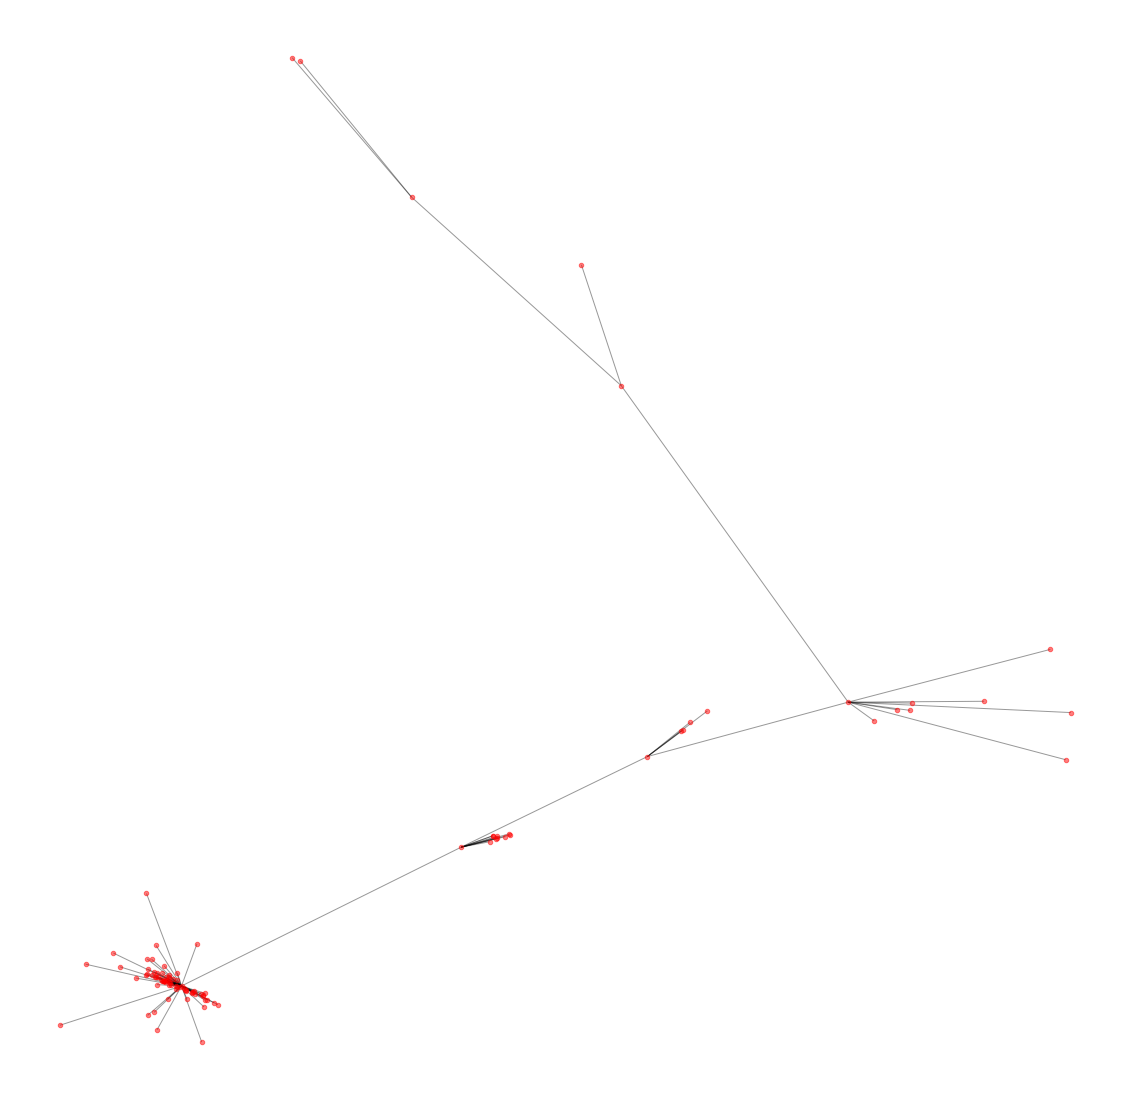

--- 0.7541234493255615 seconds ---


In [19]:
start_time = time.time()
plot_graph_spring_layout(G_sample(100), 20)
print("--- %s seconds ---" % (time.time() - start_time))

In [25]:
import utils
G_tmp = G_sample(100)
utils.getHyperbolicity(G_tmp)

(0.0, 1.0, 2.0, 28764.0)
[1399.0, 1399.0, 1399.0]
hyperbolicity: 0.0


0.0

In [22]:
G_tmp.nodes

NodeView((0.0, 1.0, 2.0, 28764.0, 3.0, 929.0, 4.0, 44.0, 51.0, 96.0, 230.0, 933.0, 2052.0, 52166.0, 92812.0, 5.0, 15.0, 162.0, 4115.0, 4582.0, 6.0, 25.0, 872.0, 881.0, 1750.0, 1903.0, 4877.0, 15114.0, 56973.0, 78403.0, 7.0, 189.0, 194.0, 322.0, 403.0, 459.0, 486.0, 559.0, 582.0, 603.0, 631.0, 651.0, 788.0, 857.0, 879.0, 1010.0, 1269.0, 1272.0, 1332.0, 1340.0, 1379.0, 1389.0, 1421.0, 1986.0, 2087.0, 2111.0, 2112.0, 2168.0, 2192.0, 2222.0, 2414.0, 2424.0, 2440.0, 2741.0, 2810.0, 2874.0, 3047.0, 3177.0, 3234.0, 3362.0, 3478.0, 3630.0, 3647.0, 3857.0, 4022.0, 4069.0, 4160.0, 4205.0, 4214.0, 4437.0, 4445.0, 4465.0, 4553.0, 4675.0, 4712.0, 4775.0, 4801.0, 4910.0, 4918.0, 5040.0, 5238.0, 5269.0, 5527.0, 5568.0, 5637.0, 5836.0, 5899.0, 5941.0, 5964.0, 6050.0))

In [23]:
G_tmp.edges

EdgeView([(0.0, 1.0), (1.0, 2.0), (1.0, 28764.0), (2.0, 3.0), (2.0, 929.0), (3.0, 4.0), (3.0, 44.0), (3.0, 51.0), (3.0, 96.0), (3.0, 230.0), (3.0, 933.0), (3.0, 2052.0), (3.0, 52166.0), (3.0, 92812.0), (4.0, 5.0), (4.0, 15.0), (4.0, 162.0), (4.0, 4115.0), (4.0, 4582.0), (5.0, 6.0), (5.0, 25.0), (5.0, 872.0), (5.0, 881.0), (5.0, 1750.0), (5.0, 1903.0), (5.0, 4877.0), (5.0, 15114.0), (5.0, 56973.0), (5.0, 78403.0), (6.0, 6.0), (6.0, 7.0), (6.0, 189.0), (6.0, 194.0), (6.0, 322.0), (6.0, 403.0), (6.0, 459.0), (6.0, 486.0), (6.0, 559.0), (6.0, 582.0), (6.0, 603.0), (6.0, 631.0), (6.0, 651.0), (6.0, 788.0), (6.0, 857.0), (6.0, 879.0), (6.0, 1010.0), (6.0, 1269.0), (6.0, 1272.0), (6.0, 1332.0), (6.0, 1340.0), (6.0, 1379.0), (6.0, 1389.0), (6.0, 1421.0), (6.0, 1986.0), (6.0, 2087.0), (6.0, 2111.0), (6.0, 2112.0), (6.0, 2168.0), (6.0, 2192.0), (6.0, 2222.0), (6.0, 2414.0), (6.0, 2424.0), (6.0, 2440.0), (6.0, 2741.0), (6.0, 2810.0), (6.0, 2874.0), (6.0, 3047.0), (6.0, 3177.0), (6.0, 3234.0), (6.

In [24]:
nx.get_edge_attributes(G_tmp,'weight')

{(0.0, 1.0): 434.0,
 (1.0, 2.0): 551.0,
 (1.0, 28764.0): 414.0,
 (2.0, 3.0): 407.0,
 (2.0, 929.0): 506.0,
 (3.0, 4.0): 4527.0,
 (3.0, 44.0): 4532.0,
 (3.0, 51.0): 446.0,
 (3.0, 96.0): 4723.0,
 (3.0, 230.0): 443.0,
 (3.0, 933.0): 1118.0,
 (3.0, 2052.0): 18818.5,
 (3.0, 52166.0): 6559.0,
 (3.0, 92812.0): 412.5,
 (4.0, 5.0): 15812.0,
 (4.0, 15.0): 48800.0,
 (4.0, 162.0): 14090.0,
 (4.0, 4115.0): 9136.0,
 (4.0, 4582.0): 40385.0,
 (5.0, 6.0): 12213.0,
 (5.0, 25.0): 32312.0,
 (5.0, 872.0): 16501.0,
 (5.0, 881.0): 42147.0,
 (5.0, 1750.0): 16229.0,
 (5.0, 1903.0): 16241.5,
 (5.0, 4877.0): 16519.5,
 (5.0, 15114.0): 18142.5,
 (5.0, 56973.0): 16243.0,
 (5.0, 78403.0): 16456.0,
 (6.0, 6.0): 7016.0,
 (6.0, 7.0): 6803.0,
 (6.0, 189.0): 171850.0,
 (6.0, 194.0): 125433.0,
 (6.0, 322.0): 128067.5,
 (6.0, 403.0): 59769.5,
 (6.0, 459.0): 111360.0,
 (6.0, 486.0): 51458.0,
 (6.0, 559.0): 102293.0,
 (6.0, 582.0): 113393.0,
 (6.0, 603.0): 40412.0,
 (6.0, 631.0): 169143.0,
 (6.0, 651.0): 153553.5,
 (6.0, 788.

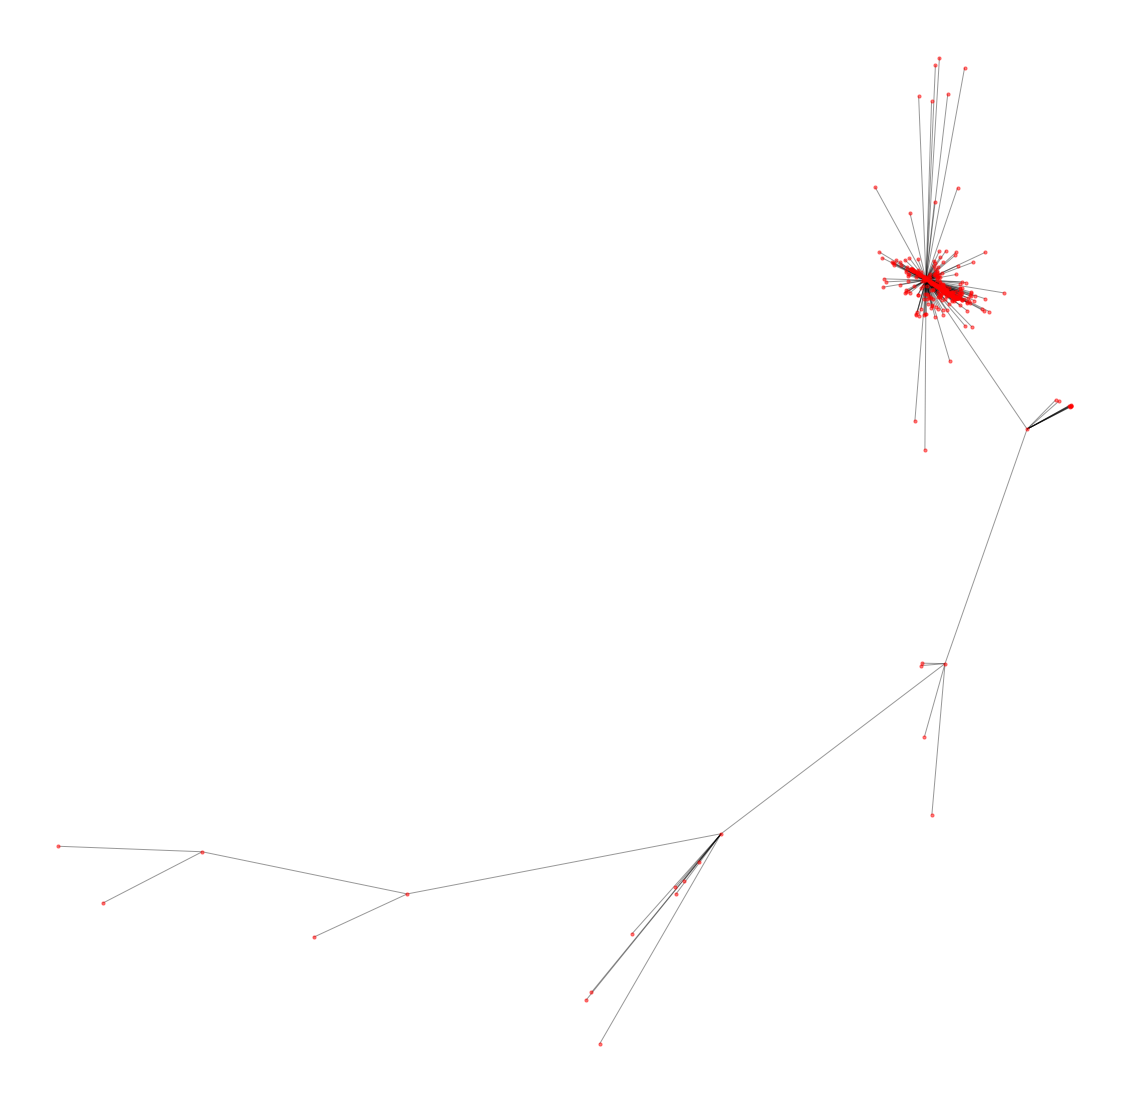

--- 5.498645544052124 seconds ---


In [57]:
start_time = time.time()
plot_graph_spring_layout(G_sample(500), 10)
print("--- %s seconds ---" % (time.time() - start_time))

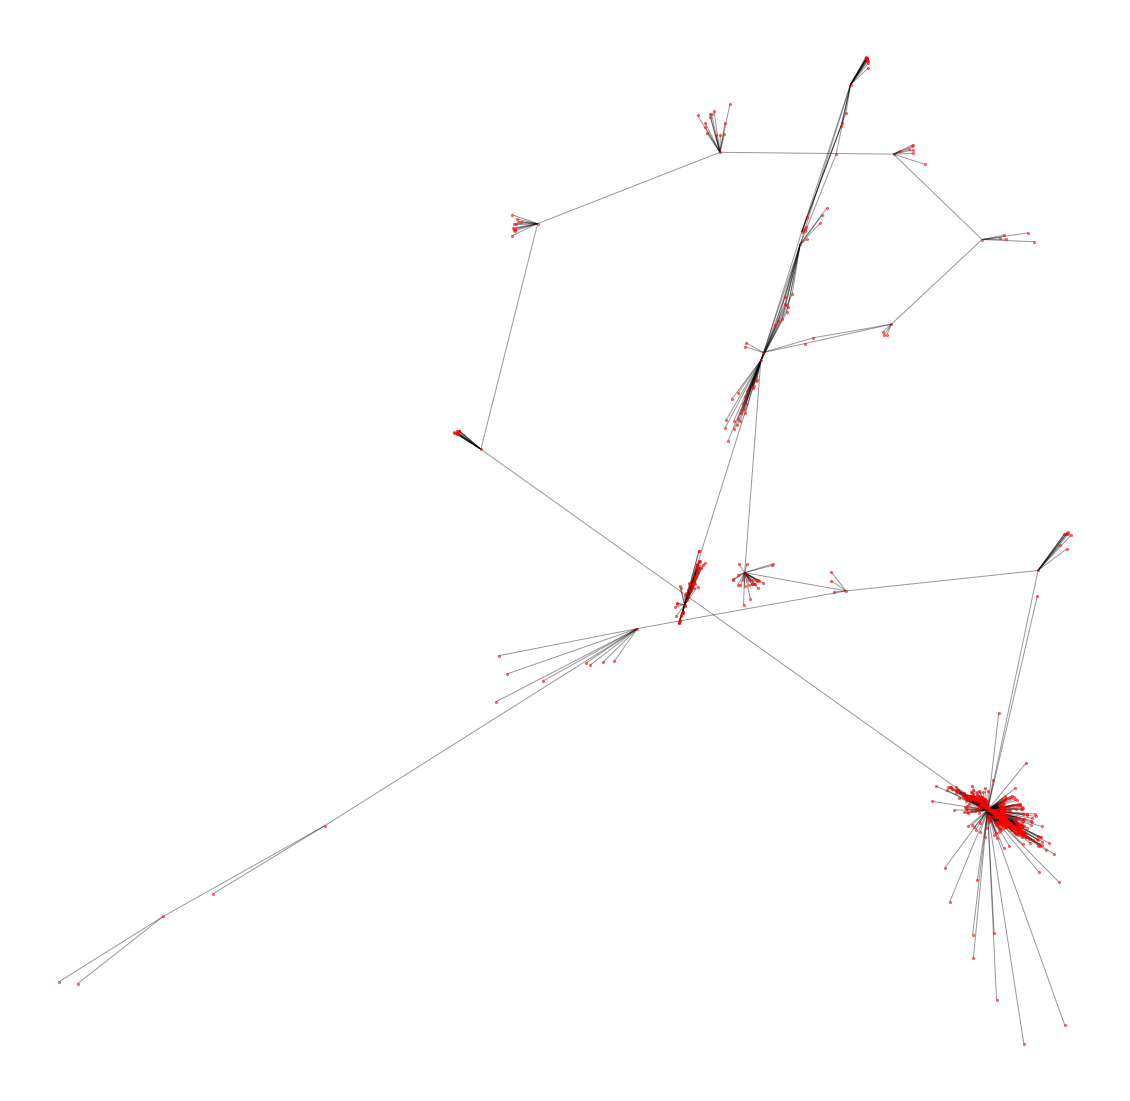

--- 13.11203384399414 seconds ---


In [58]:
start_time = time.time()
plot_graph_spring_layout(G_sample(1000), 5)
print("--- %s seconds ---" % (time.time() - start_time))

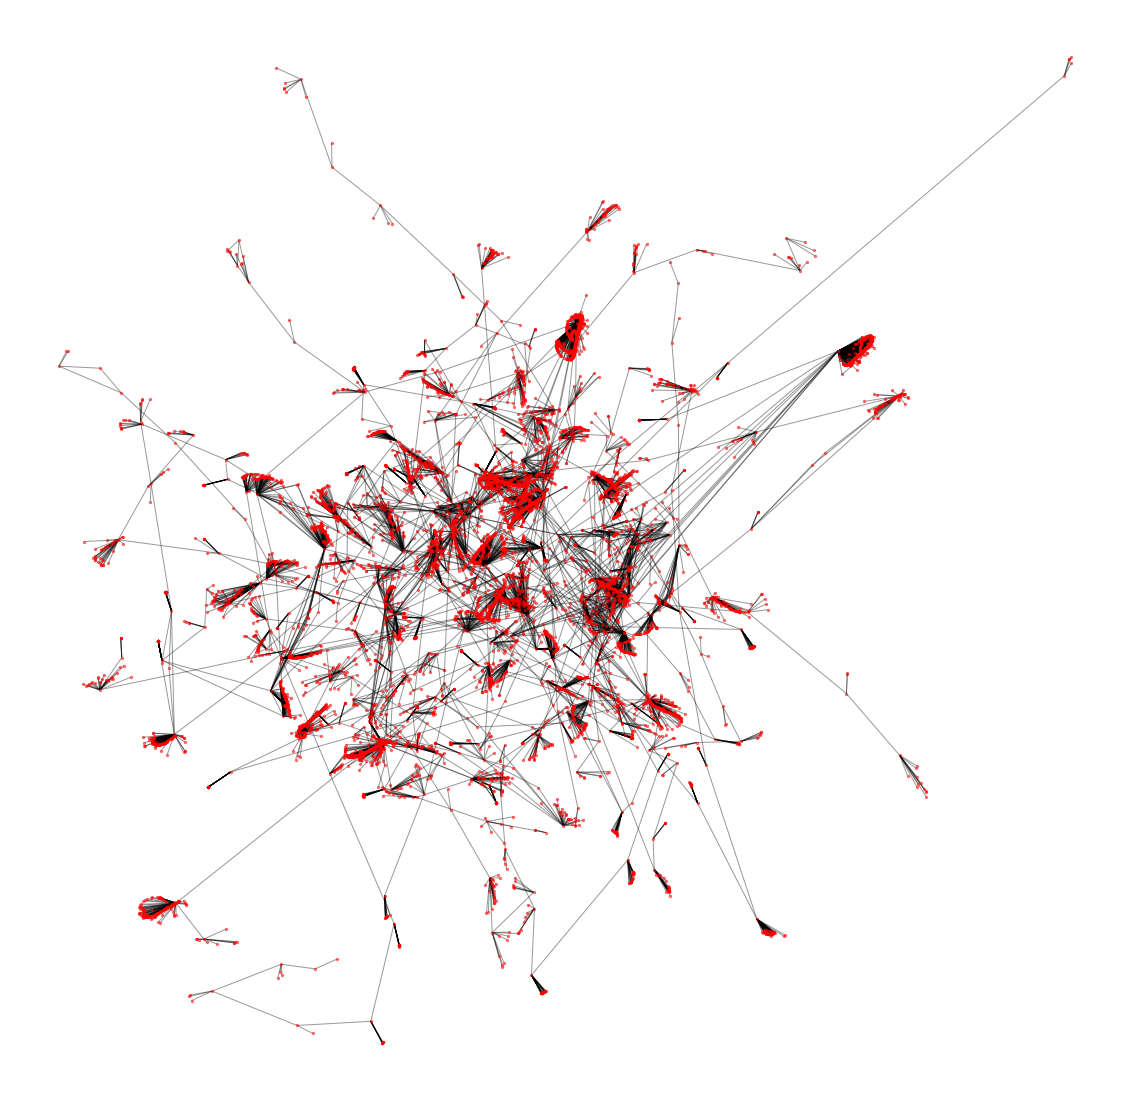

--- 353.9264953136444 seconds ---


In [59]:
start_time = time.time()
plot_graph_spring_layout(G_sample(10000), 5)
print("--- %s seconds ---" % (time.time() - start_time))